# CNN Theory

\-CNN have brought about huge changes in computer vision and other image related tasks. Although it is an old algorithm, it did not get much attention until 2012 due to lack of data and computational resources. When the first CNN (AlexNet) was used in the ImageNet competition in 2012, it improved the accuracy of prediction, by more than 15% as compared to the 2011 winner.

**WHAT IS A CONVOLUTION?**\
A convolution is an operation that changes a function into something else. We do convolutions so that we can transform the original function into a form to get more information.

Convolutions have been used for a long time in image processing to blur and sharpen images, and perform other operations, such as, enhance edges and emboss.

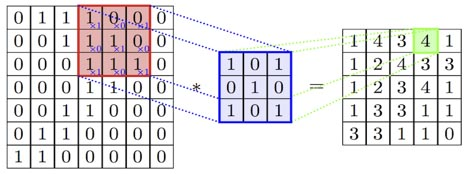

Here, the original image is the one on the left and the matrix of numbers in the middle is the convolutional matrix or filter.

A convolution operation is an element wise matrix multiplication operation. Where one of the matrices is the image, and the other is the filter or kernel that turns the image into something else. The output of this is the final convoluted image.

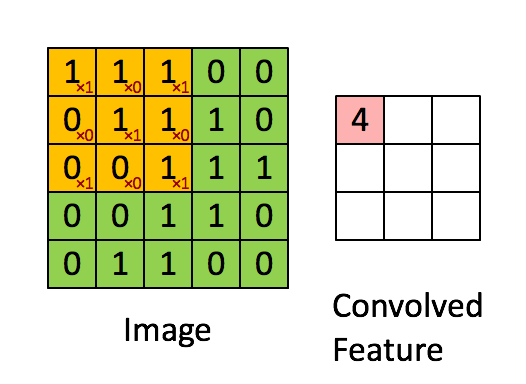

The number of pixels by which we slide the kernel is known as the stride. The stride is usually kept as 1, but we can increase it. When increased, we might have to increase the size of the image by a few pixels to fit in the kernel at the edges of the image. This increase is called padding.\
\
**THE 2D CONVOLUTION LAYER**\
The most common type of convolution that is used is the 2D convolution layer, and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer has a height and a width. They are generally smaller than the input image and so we move them across the whole image. The area where the filter is on the image is called the receptive field.

**Working:** Conv2D filters extend through the three channels in an image (Red, Green, and Blue). The filters may be different for each channel too. After the convolutions are performed individually for each channels, they are added up to get the final convoluted image. The output of a filter after a convolution operation is called a feature map.

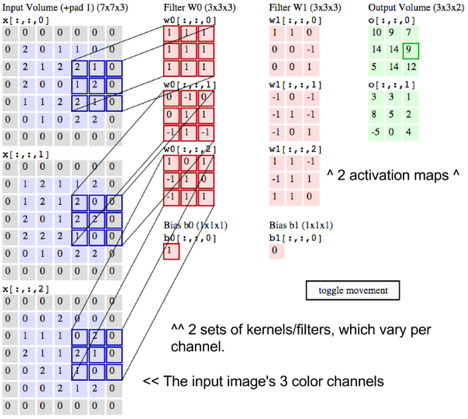

Since each conv2D filter learns a separate feature, we use many of them in a single layer to identify different features. The best part is that every filter is learnt automatically.\
\
**POOLING LAYER**\
Note: Pooling is not a convolutional layer, but we are talking about it here, as it is a layer that is used commonly in CNNs.

The pooling layer was introduced for two main reasons: The first was to perform downsampling, that is, to reduce the amount of computation that needs to be done, and the second to send only the important data to the next layers in the CNNs.

**How they work:** There are two kinds of pooling layers: max pooling and average pooling.

In max pooling, we take only the value of the largest pixel among all the pixels in the receptive field of the filter. In the case of average pooling, we take the average of all the values in the receptive field.

\
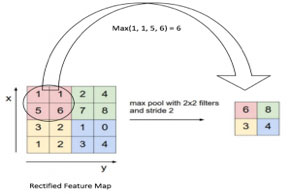

# Convnets - Convolutional Neural Networks

### This is a continuation to previous fashion-mnist dataset.

* Here we will be using convolutional nueral network instead of artifical neural network to predict the class into which the image belongs to

In [8]:
import tensorflow.keras as keras

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [10]:
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.5484 - accuracy: 0.7950
Epoch 2/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.3317 - accuracy: 0.8789
Epoch 3/5
60000/60000 [==============================] - 44s 727us/step - loss: 0.2811 - accuracy: 0.8967
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2524 - accuracy: 0.9079
Epoch 5/5
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2264 - accuracy: 0.9160


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 364us/step


In [13]:
test_acc

0.8920000195503235